In [9]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#import seaborn as sns

# Add your path here
path_datasets="/Users/danielpele/Library/CloudStorage/GoogleDrive-danpele@ase.ro/Other \
computers/Asus/G/PROIECTE/Understanding Digital Assets/Cod/Datasets/"

df = pd.read_csv(path_datasets+"btc_sentiment.csv", index_col=0)
df.interpolate(method='linear', inplace=True)
df = df.drop(columns=[ "Date"])


df
# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
df["pct_change"] = df.Close.pct_change() 
df=df.dropna()
df['log_return'] = np.log(df["pct_change"] +1)
df.to_csv(path_datasets+"btc_sentiment_predictions.csv")

/var/folders/pk/sxdc5n5x6mb322grbvxz_nm40000gp/T/ipykernel_3929/58957078.py:13: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


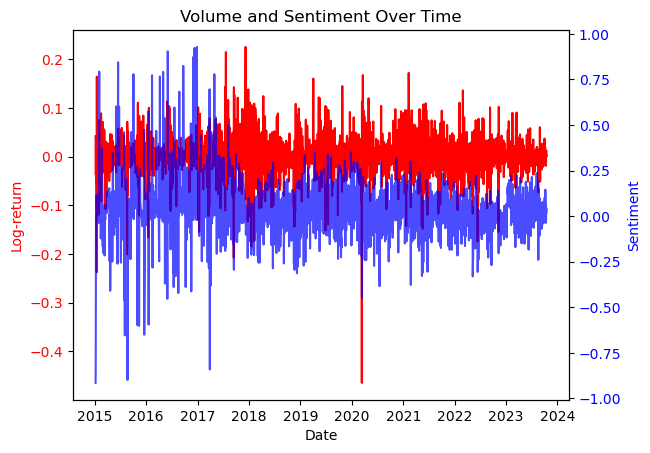

In [10]:

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
df["pct_change"] = df.Close.pct_change() 
df=df.dropna()
log_return = np.log(df["pct_change"] +1)
log_return
compound_sentiment= df['compound_sentiment']

dates = pd.to_datetime(df.index)  # Assuming the index of your DataFrame is the time series
dates
# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, log_return, color='r', label='Log-return')
ax1.set_xlabel('Date')
ax1.set_ylabel('Log-return', color='r')
ax1.tick_params(axis='y', labelcolor='r')


# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='b', label='Compound Sentiment', alpha=0.7)

ax2.set_ylabel('Sentiment', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

# Show the plot
plt.title('Volume and Sentiment Over Time')
plt.show()


In [11]:

# Exclude 'price' and 'volume' from the rolling mean calculation
exclude_columns = ['Close', 'Volume', 'Open',	'High', 'Low', 'Adj Close']

# Select columns for the rolling mean calculation
columns_for_rolling_mean = [col for col in df.columns if col not in exclude_columns]

# Calculate the  rolling mean for the selected columns
#rolling = df[columns_for_rolling_mean].rolling(window=30).mean()
rolling = df
rolling=rolling.dropna()
rolling

,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,...,weighted_neutral,weighted_compound,Open,High,Low,Close,Adj Close,Volume,pct_change,log_return
date,,,,,,,,,,,,,,,,,,,,,
2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,...,0.062886,-0.914711,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.042682,0.041796
2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,...,0.112242,-0.860018,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,0.028471,0.028073
2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,...,0.526167,-0.429961,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-0.037331,-0.038046
2015-01-09,1421,80,725,0,0,0,0,0,0,0.001225,...,0.940092,0.000097,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,0.024913,0.024607
2015-01-10,0,0,0,0,0,0,0,0,0,0.009464,...,0.936110,0.011204,287.303009,288.127014,273.966003,274.795990,274.795990,15264300,-0.053759,-0.055258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,7958,2726,995,536,56,396,33,37,61,-0.006786,...,0.707340,-0.005530,27392.076172,27474.115234,26561.099609,26873.320313,26873.320313,13648094333,-0.018900,-0.019081
2023-10-12,7202,2738,1043,1103,276,573,36,17,275,-0.023265,...,0.744325,0.035265,26873.292969,26921.439453,26558.320313,26756.798828,26756.798828,9392909295,-0.004336,-0.004345
2023-10-13,21912,2093,742,813,279,315,21,28,205,0.041183,...,0.662519,0.286812,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851,0.003946,0.003938


In [12]:
target= df[['Close','Volume']]
target


,Close,Volume
date,,
2015-01-06,286.188995,23245700
2015-01-07,294.337006,24866800
2015-01-08,283.348999,19982500
2015-01-09,290.407990,18718600
2015-01-10,274.795990,15264300
...,...,...
2023-10-11,26873.320313,13648094333
2023-10-12,26756.798828,9392909295
2023-10-13,26862.375000,15165312851


In [13]:
df_rolling=pd.concat([rolling, target],axis=1)


df_rolling=df_rolling.dropna()
df_rolling

,Likes,Comments,Shares,Love,Wow,Haha,Sad,Angry,Care,compound_sentiment,...,Open,High,Low,Close,Adj Close,Volume,pct_change,log_return,Close,Volume
date,,,,,,,,,,,,,,,,,,,,,
2015-01-06,286,46,273,0,0,0,0,0,0,-0.914711,...,274.610992,287.553009,272.696014,286.188995,286.188995,23245700,0.042682,0.041796,286.188995,23245700
2015-01-07,197,28,94,0,0,0,0,0,0,-0.860018,...,286.076996,298.753998,283.079010,294.337006,294.337006,24866800,0.028471,0.028073,294.337006,24866800
2015-01-08,0,0,0,0,0,0,0,0,0,-0.429397,...,294.135010,294.135010,282.174988,283.348999,283.348999,19982500,-0.037331,-0.038046,283.348999,19982500
2015-01-09,1421,80,725,0,0,0,0,0,0,0.001225,...,282.382996,291.114014,280.532990,290.407990,290.407990,18718600,0.024913,0.024607,290.407990,18718600
2015-01-10,0,0,0,0,0,0,0,0,0,0.009464,...,287.303009,288.127014,273.966003,274.795990,274.795990,15264300,-0.053759,-0.055258,274.795990,15264300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-11,7958,2726,995,536,56,396,33,37,61,-0.006786,...,27392.076172,27474.115234,26561.099609,26873.320313,26873.320313,13648094333,-0.018900,-0.019081,26873.320313,13648094333
2023-10-12,7202,2738,1043,1103,276,573,36,17,275,-0.023265,...,26873.292969,26921.439453,26558.320313,26756.798828,26756.798828,9392909295,-0.004336,-0.004345,26756.798828,9392909295
2023-10-13,21912,2093,742,813,279,315,21,28,205,0.041183,...,26752.878906,27092.697266,26686.322266,26862.375000,26862.375000,15165312851,0.003946,0.003938,26862.375000,15165312851


<Axes: xlabel='date'>

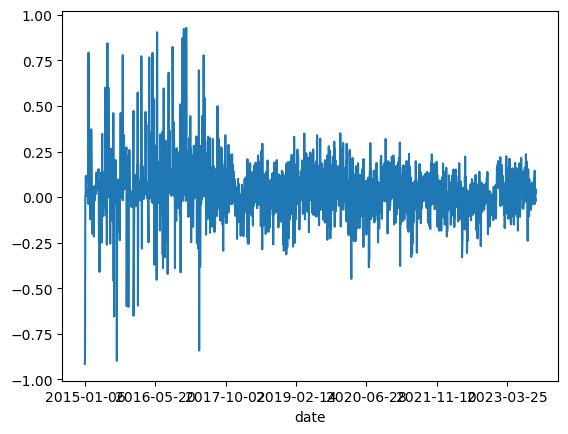

In [14]:
df_rolling["compound_sentiment"].plot()

In [15]:
df_rolling.to_csv(path_datasets+"dataset_volume.csv", index=True)

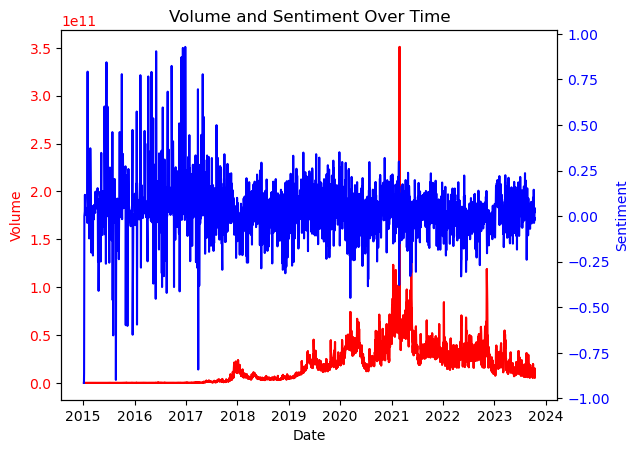

In [16]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'volume', 'compound_sentiment_MA', and 'sentiment_intensity_MA'
volume = df_rolling['Volume']
compound_sentiment= df_rolling['compound_sentiment']

dates = pd.to_datetime(df_rolling.index)  # Assuming the index of your DataFrame is the time series
dates
# Create a new figure and a subplot with shared x-axis
fig, ax1 = plt.subplots()

# Plot 'volume' on the first y-axis
ax1.plot(dates, volume, color='r', label='Volume')
ax1.set_xlabel('Date')
ax1.set_ylabel('Volume', color='r')
ax1.tick_params(axis='y', labelcolor='r')


# Create a second y-axis for the sentiment measures
ax2 = ax1.twinx()
ax2.plot(dates, compound_sentiment, color='b', label='Compound Sentiment')

ax2.set_ylabel('Sentiment', color='b')
ax2.tick_params(axis='y', labelcolor='b')

# Optional: Add legend
#ax1.legend(loc='upper left')
#ax2.legend(loc='upper right')

# Show the plot
plt.title('Volume and Sentiment Over Time')
plt.show()